In [201]:
import pandas as pd
import numpy as np
import category_encoders as ce
df = pd.read_csv('preprocessed_dataset.csv')

In [202]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["FIRE_SIZE_CLASS"] = lb_make.fit_transform(df["FIRE_SIZE_CLASS"]) # because it is ordinal
#df["STAT_CAUSE_DESCR"] = lb_make.fit_transform(df["STAT_CAUSE_DESCR"])
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'])
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'])
df['DISCOVERY_DATE']=df.DISCOVERY_DATE.apply(lambda x: x.strftime('%Y%m%d')).astype(int)
df['CONT_DATE'] = df.CONT_DATE.apply(lambda x: x.strftime('%Y%m%d')).astype(int)
df

,FOD_ID,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,COUNTY
0,46487,FS,Salmon-Challis National Forest,1992,19920620,1.0,Lightning,0.1,0,45.308333,-114.475000,USFS,ID,1035,19920620,1336.0,Lemhi County
1,242377,BLM,Rock Springs Field Office,1992,19920821,1.0,Lightning,0.1,0,41.416600,-109.234000,BLM,WY,1428,19920822,1800.0,Sweetwater County
2,49259,FS,Shasta-Trinity National Forest,1992,19920624,1.0,Lightning,0.1,0,40.730000,-122.475000,USFS,CA,1135,19920624,1800.0,Shasta County
3,50588,FS,Malheur National Forest,1992,19920801,1.0,Lightning,0.1,0,44.296667,-118.738333,USFS,OR,1538,19920801,2200.0,Grant County
4,222205,BLM,Susanville District,1992,19920628,1.0,Lightning,0.1,0,40.666600,-120.484400,BLM,CA,1100,19920628,1324.0,Lassen County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376096,300286438,ST/C&L,Arizona State Forestry Division - State Office,2015,20150316,13.0,Missing/Undefined,0.1,0,33.493680,-112.277619,MISSING/NOT SPECIFIED,AZ,1537,20150316,1800.0,Maricopa County
376097,300287009,ST/C&L,San Mateo-Santa Cruz Unit,2015,20150423,13.0,Missing/Undefined,1.0,1,37.414050,-122.193200,MISSING/NOT SPECIFIED,CA,1321,20150423,1334.0,SAN MATEO
376098,300307593,ST/C&L,Butte Unit,2015,20150812,13.0,Missing/Undefined,0.1,0,39.501869,-121.605211,MISSING/NOT SPECIFIED,CA,1246,20150812,1300.0,BUTTE
376099,300288242,ST/C&L,Arizona State Forestry Division - State Office,2015,20150711,13.0,Missing/Undefined,0.1,0,32.230100,-110.798700,MISSING/NOT SPECIFIED,AZ,1382,20150711,1800.0,Pima County


In [204]:
X = df.drop(columns=['STAT_CAUSE_CODE','STAT_CAUSE_DESCR','OWNER_DESCR','FOD_ID','DISCOVERY_TIME',
                    'CONT_TIME','FIRE_SIZE_CLASS','SOURCE_REPORTING_UNIT_NAME','NWCG_REPORTING_AGENCY'])
#y = df['STAT_CAUSE_DESCR']
y = df['STAT_CAUSE_CODE'].astype(int)

In [205]:
#features= ['NWCG_REPORTING_AGENCY','SOURCE_REPORTING_UNIT_NAME','STATE','COUNTY']
features= ['STATE','COUNTY']
encoder_stat_county = ce.TargetEncoder(cols = features,drop_invariant=True, return_df=True)
X = encoder_stat_county.fit_transform(X,y)

In [206]:
# dont do encoding if using sparse categorial corss entropy
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y[:, np.newaxis]).toarray()

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state=15,test_size=0.2)

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled,columns=X.columns.tolist())
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns=X.columns.tolist())

In [209]:
import ssl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
ssl._create_default_https_context = ssl._create_unverified_context
import warnings
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [210]:
X_train = X_train.iloc[:].values # converting into numpy array
X_test = X_test.iloc[:].values
#y_test = y_test.iloc[:].values
#y_train = y_train.iloc[:].values

In [195]:
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)
#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)

# use this if we are not encoding Y

In [211]:

features = len(X.columns)
classes = 13
def create_models(input_dim, output_dim, nodes, n=1, name='wildfiremodel'):
    def get_model():
        # Create model
        model = Sequential(name=name)
        for i in range(2*n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim))

        # Compile model
        model.compile( loss=keras.losses.CategoricalCrossentropy(from_logits=True,reduction='none'),
            optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
        return model
    return get_model

models = [create_models(features, classes, 50, i, 'wildfireModel_{}'.format(i)) 
          for i in range(1, 4)]

for get_model in models:
    get_model().summary()

Model: "wildfireModel_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_601 (Dense)            (None, 50)                450       
_________________________________________________________________
dense_602 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_603 (Dense)            (None, 13)                663       
Total params: 3,663
Trainable params: 3,663
Non-trainable params: 0
_________________________________________________________________
Model: "wildfireModel_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_604 (Dense)            (None, 50)                450       
_________________________________________________________________
dense_605 (Dense)            (None, 50)                2550      
________________________

In [212]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for get_model in models:
    model = get_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, y_train,
                                 batch_size=1000,
                                 epochs=500,
                                 verbose=0,
                                 validation_data=(X_test,y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, y_test, verbose=2)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: wildfireModel_1
2351/2351 - 1s - loss: 1.4889 - accuracy: 0.4998
Test loss: 1.4888885021209717
Test accuracy: 0.4997939467430115
Model name: wildfireModel_2
2351/2351 - 1s - loss: 1.4505 - accuracy: 0.5122
Test loss: 1.4504798650741577
Test accuracy: 0.5121707916259766
Model name: wildfireModel_3
2351/2351 - 2s - loss: 1.4255 - accuracy: 0.5183
Test loss: 1.425485610961914
Test accuracy: 0.5183259844779968


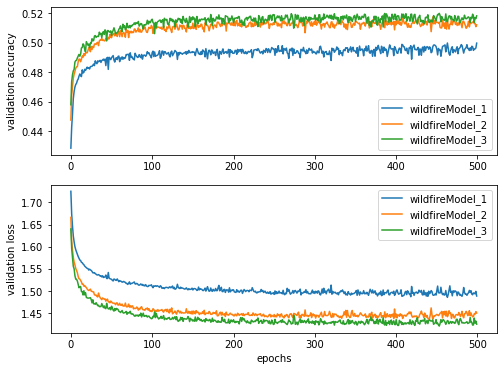

In [213]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

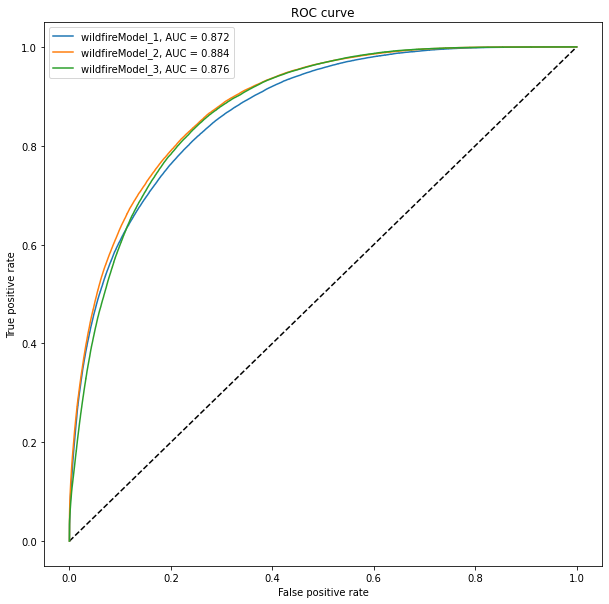

In [214]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [200]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

get_model = create_models(features, classes, 10, 3)

estimator = KerasClassifier(build_fn=get_model, epochs=50, batch_size=10000, verbose=0)
scores = cross_val_score(estimator, X, y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.03 (+/- 0.03)


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

inputs = keras.Input(shape=(13,))
x = layers.Dense(10, activation='relu')(inputs)
x = layers.Dense(4, activation='relu')(inputs)
outputs = layers.Dense(13,activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="wildfire_model")
model.summary()
model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True,reduction='none'),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=1000, epochs=100, validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])